# Creating synthetic RM maps using radiation postprocessing data

This script focus on using the UV radiation post-processing dataset presented in [Kado-Fong et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...897..143K/abstract) to create rotation measure maps.

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.insert(0, "../module/") #add path for import
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import tigress_read #scripts for reading data
import yt #https://yt-project.org/

/Users/ckim/miniconda3/envs/packaging/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/ckim/.config/yt/ytrc is deprecated in favor of /Users/ckim/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


## Examining the simulation model information

In [5]:
#master directory of where the data is stored
dir_master = "../data/" #this is default
model_id = "R8_4pc" #name of the simulation model
model = tigress_read.Model(model_id, dir_master=dir_master) #reading the model information

In [6]:
#load the UV data set for the snapshot ivtk=300
model.load(300, dataset="rad")

In [9]:
#load magnetic field separately (for now, radiation output doesn't include B)
model.load(300, dataset="Bfield")

In [10]:
#we need electron density and los B field (in this case, along the z-axis)
#read in the data in the code units and reorder it to (z,y,x)
ne = model.rad.grid['ne'].value.T
Blos = model.Bfield.grid['cell_centered_B_z'].value.T

In [11]:
#set some useful information about the simulation domain
dx_pc = model.rad.grid['dx'][0,0,0].to('pc').value
dx_cm = model.rad.grid['dx'][0,0,0].to('cm').value

xcc = model.rad.grid["x"][:,0,0].to('pc').value 
ycc = model.rad.grid["y"][0,:,0].to('pc').value
zcc = model.rad.grid["z"][0,0,:].to('pc').value

/Users/ckim/miniconda3/envs/packaging/lib/python3.8/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'dx' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'athena'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("athena", "dx")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
/Users/ckim/miniconda3/envs/packaging/lib/python3.8/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'dx' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'athena'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "dx")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
/Users/ckim/miniconda3/envs/packaging/lib/python3.8/site-packages/yt/data_o

In [33]:
#calculate RM (what is the right units, BTW?)
RM = (ne*Blos*dx_pc)

In [14]:
from matplotlib.colors import LogNorm

In [15]:
plt.rcParams['figure.dpi']=200

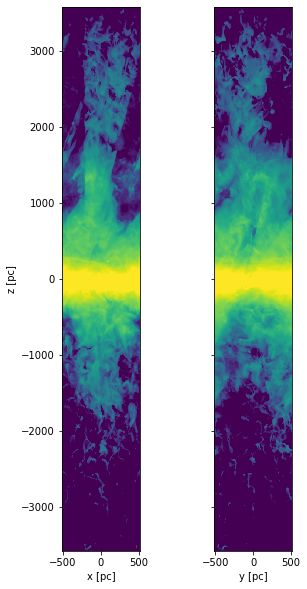

In [18]:
# example projected Ne maps
fig,axes = plt.subplots(1,2,figsize=(5,10),sharey=True)
plt.sca(axes[0])
plt.pcolormesh(xcc,zcc,(ne*dx_cm).sum(axis=1),norm=LogNorm(1.e16,1.e21),shading='nearest')
plt.ylabel('z [pc]')
axes[0].set_aspect('equal')
plt.xlabel('x [pc]')
plt.sca(axes[1])
plt.pcolormesh(ycc,zcc,(ne*dx_cm).sum(axis=2),norm=LogNorm(1.e16,1.e21),shading='nearest')
plt.xlabel('y [pc]')
axes[1].set_aspect('equal')

In [19]:
print(ne.shape)

(1792, 256, 256)


In [22]:
# construct RM maps above 1kpc
kcut = np.min(np.where(zcc>1000)[0])

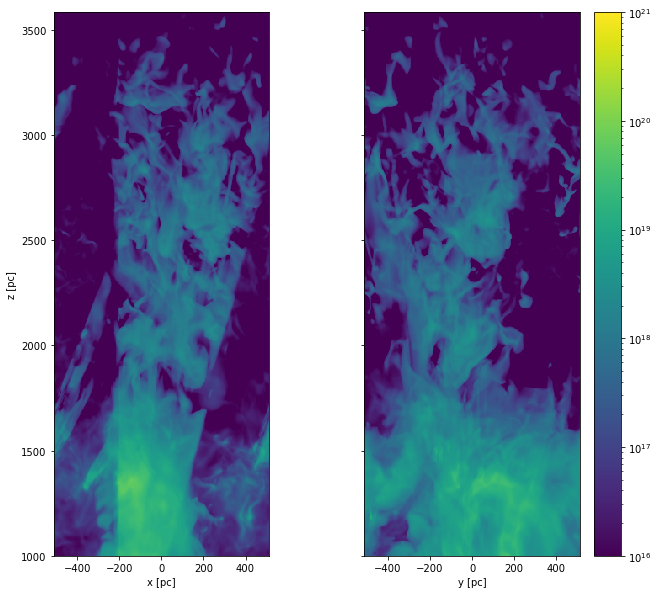

In [31]:
# example projected Ne maps
fig,axes = plt.subplots(1,2,figsize=(11,10),sharey=True)
plt.sca(axes[0])
plt.pcolormesh(xcc,zcc[kcut:],(ne[kcut:,:,:]*dx_cm).sum(axis=1),norm=LogNorm(1.e16,1.e21),shading='nearest')
plt.ylabel('z [pc]')
axes[0].set_aspect('equal')
plt.xlabel('x [pc]')
plt.sca(axes[1])
plt.pcolormesh(ycc,zcc[kcut:],(ne[kcut:,:,:]*dx_cm).sum(axis=2),norm=LogNorm(1.e16,1.e21),shading='nearest')
plt.xlabel('y [pc]')
axes[1].set_aspect('equal')
plt.colorbar()

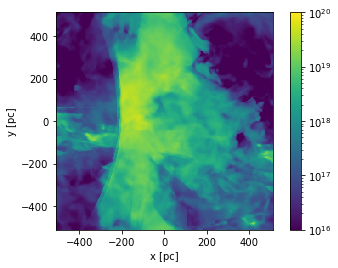

In [32]:
plt.pcolormesh(xcc,ycc,(ne*dx_cm)[kcut:,:,:].sum(axis=0),norm=LogNorm(1.e16,1.e20),shading='nearest')
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')
plt.gca().set_aspect('equal')
plt.colorbar()

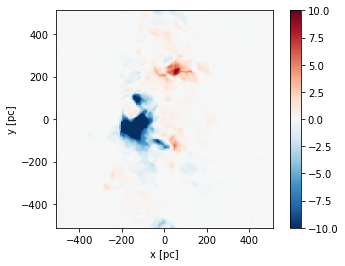

In [39]:
plt.pcolormesh(xcc,ycc,(RM)[kcut:,:,:].sum(axis=0),
               vmin=-10,vmax=10,shading='nearest',cmap=plt.cm.RdBu_r)
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')
plt.gca().set_aspect('equal')
plt.colorbar()